In [1]:
import os
import glob
import numpy as np
import xarray as xr
import pandas as pd
import seaborn as sns
import geopandas as gpd

import cartopy.crs as ccrs
import scipy.stats as stats
from playsound import playsound

from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

import shapely.geometry as sg
from shapely.geometry import Point

import sys
sys.path.append(os.path.abspath(".."))
from function import ART_downscale as ART_down
from function import ART_preprocessing as ART_pre

import warnings
warnings.filterwarnings('ignore')

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


In [4]:
yy_s, yy_e = 2002, 2022

npix = 2

area = 'VENETO'

method = 'mar'
opt = 'genetic'

NEIBHR = 2*npix+1

In [5]:
data_base = os.path.join('/','media','arturo','Arturo','Data','Italy','Satellite')

In [13]:
veneto_dir = os.path.join('/','media','arturo','Arturo','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    VENETO = gpd.read_file(os.path.join(veneto_dir,'Veneto.geojson'))
    DEM = gpd.read_file(os.path.join(veneto_dir,'Veneto_DEM_500.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

In [95]:
# data_dir = os.path.join(data_base,'5_DOWN',f'{area}_DOWN_IMERG_1dy_{yy_s}_{yy_e+1}_npix_{npix}_thr_1_acf_{method}_{opt}_pearson.nc')
data_dir = os.path.join(data_base,'5_DOWN',f'{area}_DOWN_ERA5_3h_{yy_s}_{yy_e+1}_npix_{npix}_thr_1_acf_{method}_{opt}_pearson.nc')
DATA = xr.open_dataset(data_dir)
DATA = DATA.sel(year=slice(2002, 2022))

lon2d_IMERG, lat2d_IMERG  = np.meshgrid(DATA.lon.values, DATA.lat.values)
lons_IMERG, lats_IMERG = DATA.lon.values, DATA.lat.values

Tr = DATA.Tr.values

BETA = DATA.BETA.values
GAMMA = DATA.GAMMA.values

NYs = DATA.NYs.values
CYs = DATA.CYs.values
WYs = DATA.WYs.values

NYd = DATA.NYd.values
CYd = DATA.CYd.values
WYd = DATA.WYd.values

Mev_d = DATA.Mev_d.values

In [65]:
beta_min, beta_max = np.min(BETA), np.max(BETA)
print(f'Beta min: {beta_min}, Beta max: {beta_max}')

gamma_min, gamma_max = np.min(GAMMA), np.max(GAMMA)
print(f'Gamma min: {gamma_min}, Gamma max: {gamma_max}')

Beta min: 0.8590362555437148, Beta max: 1.2570926242230829
Gamma min: 0.9361732346804335, Gamma max: 0.9672675125822201


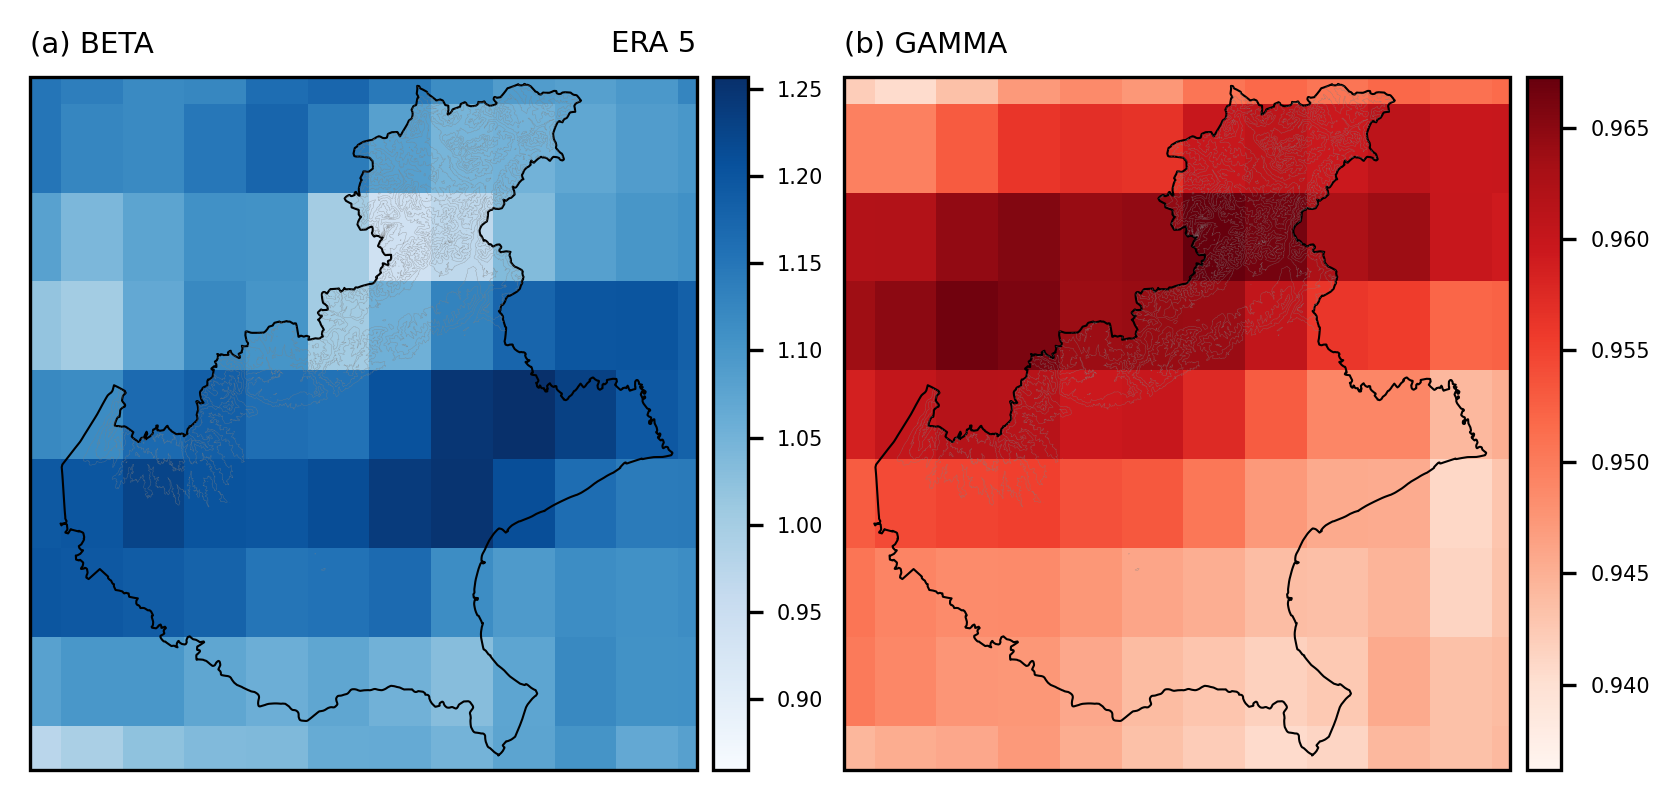

In [90]:
cmap_beta = plt.cm.Blues
cmap_gamma = plt.cm.Reds
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(7,3),dpi=300)
gs = gridspec.GridSpec(1,2)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
DEM.plot(facecolor='None',color='grey',alpha=0.6, ax=ax1, linewidth=0.1, zorder=10)

a1 = ax1.pcolormesh(lon2d_IMERG, lat2d_IMERG, BETA, cmap=cmap_beta)

cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.045)
cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(a) BETA', fontsize=7, loc='left')
ax1.set_title(f'ERA 5', fontsize=7, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
DEM.plot(facecolor='None',color='grey',alpha=0.6, ax=ax1, linewidth=0.1, zorder=10)

a1 = ax1.pcolormesh(lon2d_IMERG, lat2d_IMERG, GAMMA, cmap=cmap_gamma)

cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.045)
cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(b) GAMMA', fontsize=7, loc='left')

# ============================================================================================================================
plt.subplots_adjust(wspace=0, hspace=0)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

In [67]:
N_min = np.min([np.nanmin(np.nanmean(NYs,axis=0)), np.nanmin(np.nanmean(NYd,axis=0))])
N_max = np.max([np.nanmax(np.nanmean(NYs,axis=0)), np.nanmax(np.nanmean(NYd,axis=0))])
print(f'NY min: {N_min}, NY max: {N_max}')

NY min: 89.14285714285714, NY max: 217.52380952380952


In [76]:
C_min = np.min([np.nanmin(np.nanmean(CYs,axis=0)), np.nanmin(np.nanmean(CYd,axis=0))])
C_max = np.max([np.nanmax(np.nanmean(CYs,axis=0)), np.nanmax(np.nanmean(CYd,axis=0))])
print(f'NY min: {C_min}, NY max: {C_max}')

NY min: 4.279054354171827, NY max: 11.082705172331837


In [77]:
W_min = np.min([np.nanmin(np.nanmean(WYs,axis=0)), np.nanmin(np.nanmean(WYd,axis=0))])
W_max = np.max([np.nanmax(np.nanmean(WYs,axis=0)), np.nanmax(np.nanmean(WYd,axis=0))])
print(f'NY min: {W_min}, NY max: {W_max}')

NY min: 0.6818455782966649, NY max: 0.997660094996911


In [84]:
N_level = np.arange(80,210,10)
N_norm = mcolors.BoundaryNorm(boundaries=N_level, ncolors=256)

C_level = np.arange(4,12,1)
C_norm = mcolors.BoundaryNorm(boundaries=C_level, ncolors=256)

W_level = np.arange(0.5,1.05,0.05)
W_norm = mcolors.BoundaryNorm(boundaries=W_level, ncolors=256)

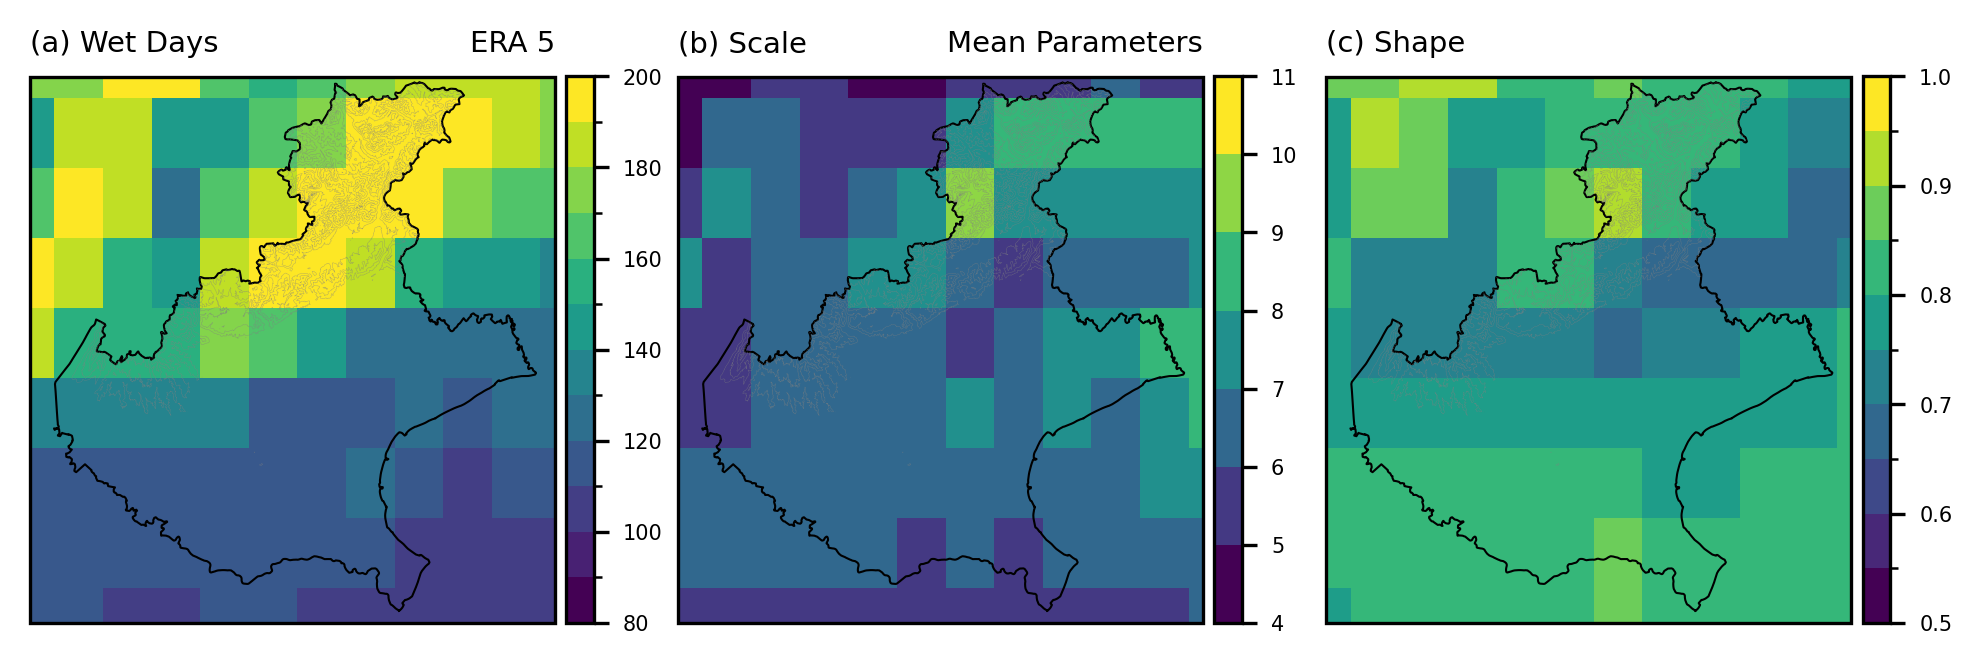

In [87]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,3),dpi=300)
gs = gridspec.GridSpec(1,3)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
DEM.plot(facecolor='None',color='grey',alpha=0.6, ax=ax1, linewidth=0.1, zorder=10)

a1 = ax1.pcolormesh(lon2d_IMERG, lat2d_IMERG, np.nanmean(NYs,axis=0), norm=N_norm)

cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(a) Wet Days', fontsize=7, loc='left')
ax1.set_title(f'ERA 5', fontsize=7, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
DEM.plot(facecolor='None',color='grey',alpha=0.6, ax=ax1, linewidth=0.1, zorder=10)

a1 = ax1.pcolormesh(lon2d_IMERG, lat2d_IMERG, np.nanmean(CYs,axis=0), norm=C_norm)

cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(b) Scale', fontsize=7, loc='left')
ax1.set_title(f'Mean Parameters', fontsize=7, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
DEM.plot(facecolor='None',color='grey',alpha=0.6, ax=ax1, linewidth=0.1, zorder=10)

a1 = ax1.pcolormesh(lon2d_IMERG, lat2d_IMERG, np.nanmean(WYs,axis=0), norm=W_norm)

cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(c) Shape', fontsize=7, loc='left')

# ============================================================================================================================
plt.subplots_adjust(wspace=0.15, hspace=0.1)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

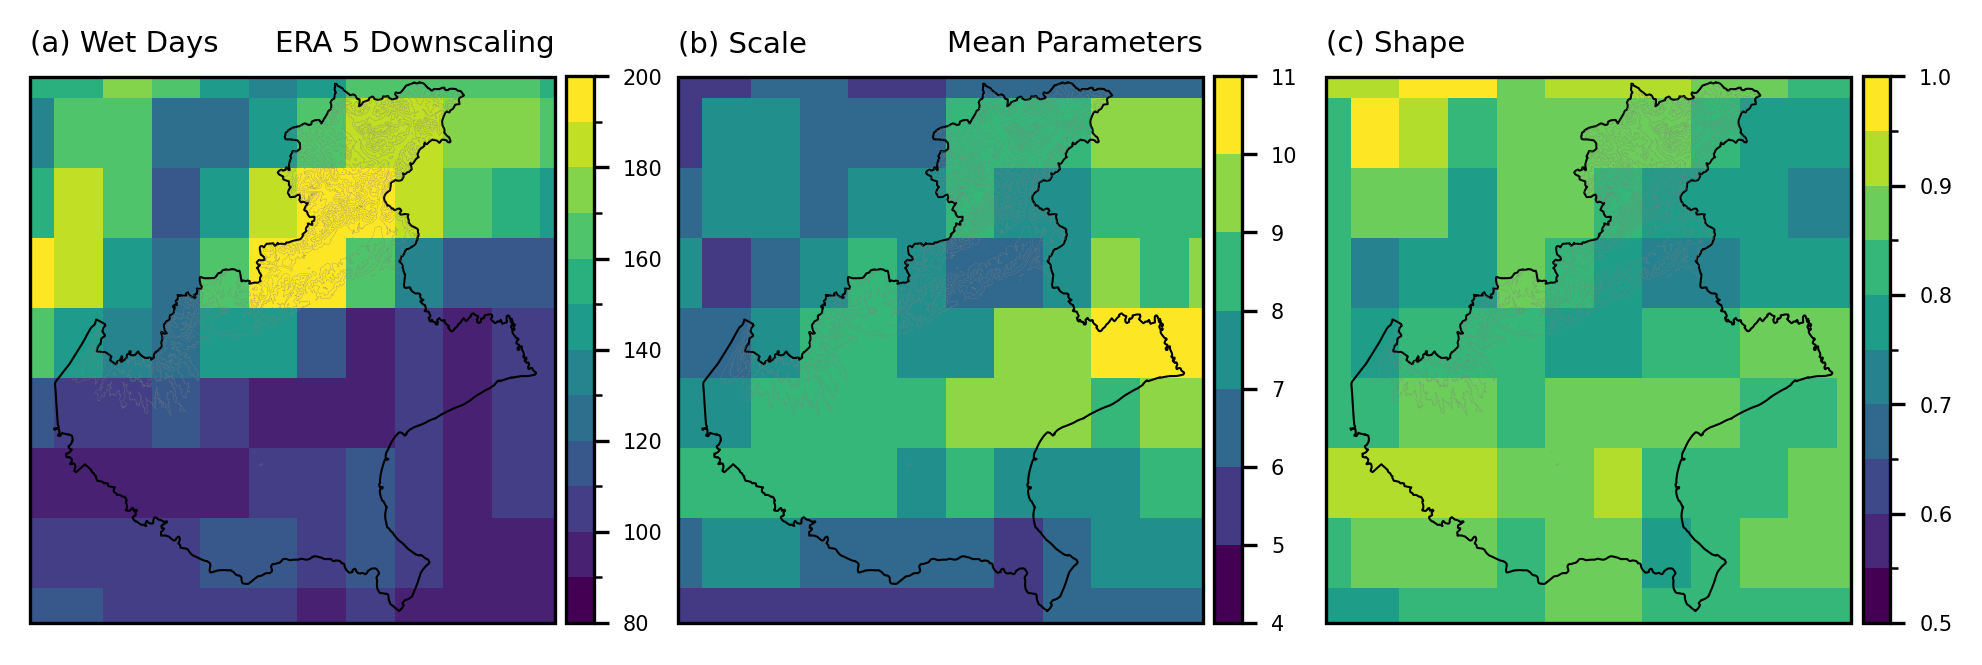

In [88]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,3),dpi=300)
gs = gridspec.GridSpec(1,3)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
DEM.plot(facecolor='None',color='grey',alpha=0.6, ax=ax1, linewidth=0.1, zorder=10)

a1 = ax1.pcolormesh(lon2d_IMERG, lat2d_IMERG, np.nanmean(NYd,axis=0), norm=N_norm)

cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(a) Wet Days', fontsize=7, loc='left')
ax1.set_title(f'ERA 5 Downscaling', fontsize=7, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
DEM.plot(facecolor='None',color='grey',alpha=0.6, ax=ax1, linewidth=0.1, zorder=10)

a1 = ax1.pcolormesh(lon2d_IMERG, lat2d_IMERG, np.nanmean(CYd,axis=0), norm=C_norm)

cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(b) Scale', fontsize=7, loc='left')
ax1.set_title(f'Mean Parameters', fontsize=7, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
DEM.plot(facecolor='None',color='grey',alpha=0.6, ax=ax1, linewidth=0.1, zorder=10)

a1 = ax1.pcolormesh(lon2d_IMERG, lat2d_IMERG, np.nanmean(WYd,axis=0), norm=W_norm)

cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(c) Shape', fontsize=7, loc='left')

# ============================================================================================================================
plt.subplots_adjust(wspace=0.15, hspace=0.1)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

In [110]:
Q_min = np.min([np.min(Mev_d[1,:,:]), np.min(Mev_d[2,:,:]), np.min(Mev_d[3,:,:])])
Q_max = np.max([np.max(Mev_d[1,:,:]), np.max(Mev_d[2,:,:]), np.max(Mev_d[3,:,:])])
print(f'Q min: {Q_min}, Q max: {Q_max}')

Q_level = np.arange(45,200,5)
Q_norm = mcolors.BoundaryNorm(boundaries=Q_level, ncolors=256)

Q min: 48.32913255699608, Q max: 195.56135518134082


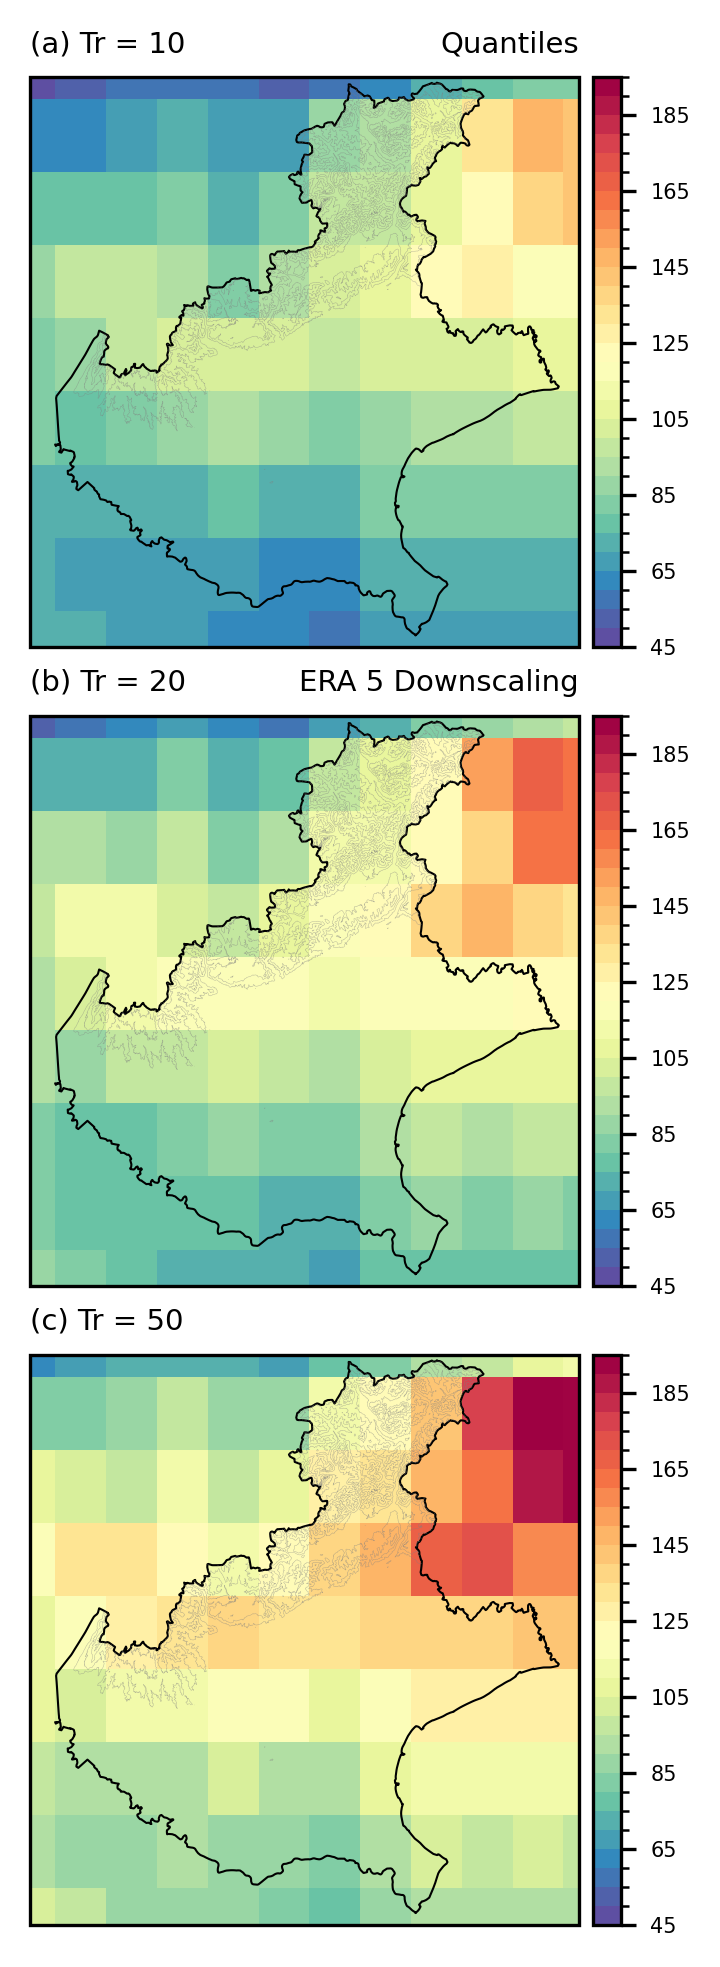

In [112]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(3,8),dpi=300)
gs = gridspec.GridSpec(3,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
DEM.plot(facecolor='None',color='grey',alpha=0.6, ax=ax1, linewidth=0.1, zorder=10)

a1 = ax1.pcolormesh(lon2d_IMERG, lat2d_IMERG, Mev_d[1,:,:], norm=Q_norm, cmap=cmap)

cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(a) Tr = {Tr[1]}', fontsize=7, loc='left')
ax1.set_title(f'Quantiles', fontsize=7, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[1, 0], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
DEM.plot(facecolor='None',color='grey',alpha=0.6, ax=ax1, linewidth=0.1, zorder=10)

a1 = ax1.pcolormesh(lon2d_IMERG, lat2d_IMERG, Mev_d[2,:,:], norm=Q_norm, cmap=cmap)

cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(b) Tr = {Tr[2]}', fontsize=7, loc='left')
ax1.set_title(f'ERA 5 Downscaling', fontsize=7, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[2, 0], projection = proj)
ax1.set_extent([10.5, 13.2, 44.75, 46.7],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
DEM.plot(facecolor='None',color='grey',alpha=0.6, ax=ax1, linewidth=0.1, zorder=10)

a1 = ax1.pcolormesh(lon2d_IMERG, lat2d_IMERG, Mev_d[3,:,:], norm=Q_norm, cmap=cmap)

cbar = plt.colorbar(a1, ticks= None, orientation='vertical', pad=0.02, fraction=0.0485)
cbar.ax.tick_params(labelsize=5)

ax1.set_title(f'(c) Tr = {Tr[3]}', fontsize=7, loc='left')

# ============================================================================================================================
plt.subplots_adjust(wspace=0.15, hspace=0.12)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)